In [2]:
import numpy
import matplotlib.pyplot as plt
import math
import random

Check if prac_nums are from 0 to 1
0.00033506983891129494
0.9998974301852286
Theoretical histogram
[500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0]
Practical histogram
[500, 466, 484, 544, 512, 475, 513, 497, 500, 479, 514, 523, 496, 512, 485, 519, 487, 529, 500, 465]
Average:  0.5004481844864785
Dispersion:  0.08245923508446089
Chi2:  16.883999999999997


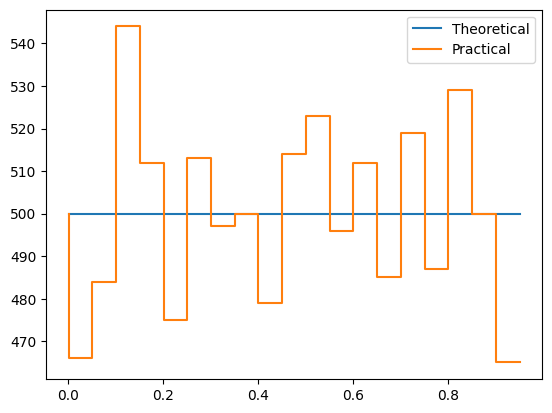

In [3]:
AMOUNT_OF_NUMBERS = 10000
A = 5 ** 13
C = 2 ** 31
Z0 = 12345

STEPS = 20

def generate_congruend(z, a, c, amount):
    ret = []

    for _ in range(amount):
        z = a * z % c
        x = z / c
        ret.append(x)
    
    return ret


prac_nums = generate_congruend(Z0, A, C, AMOUNT_OF_NUMBERS)
min = numpy.min(prac_nums)
max = numpy.max(prac_nums)
step = max / STEPS

print("Check if prac_nums are from 0 to 1")
print(numpy.min(prac_nums))
print(numpy.max(prac_nums))

theor_hist = [AMOUNT_OF_NUMBERS / STEPS for _ in range(STEPS)]
print("Theoretical histogram")
print(theor_hist)

prac_hist = []
for i in numpy.arange(min, max, step):
    count = 0
    for j in prac_nums:
        if i <= j < i + step:
            count += 1
    prac_hist.append(count)

print("Practical histogram")
print(prac_hist)


average = numpy.average(prac_nums)
dispersion = numpy.var(prac_nums)
print("Average: ", average)
print("Dispersion: ", dispersion)

chi2 = 0
for i in range(STEPS):
    chi2 += (prac_hist[i] - theor_hist[i]) ** 2 / theor_hist[i]

print("Chi2: ", chi2)

plt.step(numpy.arange(min, max, step), theor_hist, label='Theoretical')
plt.step(numpy.arange(min, max, step), prac_hist, label='Practical')
plt.legend()
plt.show()

